In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Linear Regression with Polynomial Curve Fitting	


In [2]:
#data loading
df = pd.read_csv('globalTemp.csv')
x = df['Year'].to_numpy()
y = df['Actual Temp'].to_numpy()

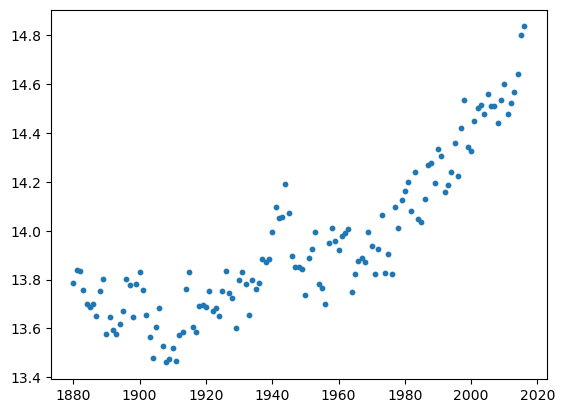

In [3]:
plt.scatter(x, y, s = 10)

In [4]:
# 用二阶多项式去拟合

order = 2 #多项式的阶数
X = np.array([x**i for i in range(order+1)]).T

In [13]:
print(X[0])
print(X.shape)
y.shape

[      1    1880 3534400]
(137, 3)


(137,)

Task: implement yourself linear regression using numpy

In [35]:
W = np.linalg.inv(X.T @ X)
W = W @ X.T @ y
y_hat = X @ W


Task: implement linear regression using the functions from sklearn

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [36]:
model = LinearRegression().fit(X, y)
# print(model.intercept_)
# print(type(model.intercept_))
# print(model.coef_)
# print(model.coef_.shape)
W_2 = np.array([model.intercept_, 0, 0]) + model.coef_
y_hat2 = X @ W_2

verify your answer with codes below

In [37]:
print("our weight = ", W)
print("sklearn weight = ", W_2)

our weight =  [ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]
sklearn weight =  [ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]


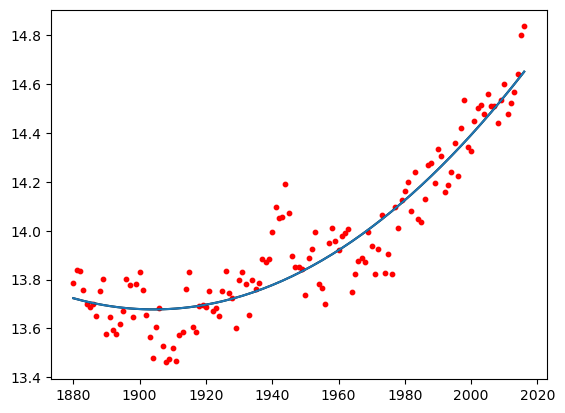

In [38]:
plt.scatter(x, y, s=10, c="r")
plt.plot(x, y_hat,c="k")
plt.plot(x, y_hat2)

## Linear Regression

In [39]:
N_SAMPLES = 500
N_FEATURES = 200
NOISE = 3
data = datasets.make_regression(n_samples=N_SAMPLES, 
                                n_features=N_FEATURES, 
                                n_informative=5, 
                                noise=NOISE, 
                                random_state=9961)
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9961)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 200) (350,)
(150, 200) (150,)


Task: use numpy to implement linear regression via the normal equation, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [62]:
my_W = np.linalg.inv(X_train.T @ X_train)
my_W = my_W @ X_train.T @ y_train

my_L1 = np.linalg.norm(my_W, ord=1)
my_L2 = np.linalg.norm(my_W, ord=2)
my_MSE_train = np.mean((y_train - X_train @ my_W)**2)
my_MSE_test = np.mean((y_test - X_test @ my_W)**2)

print("My LinearRegression model:")
print(f"L1 norms of the learned weights: {my_L1}")
print(f"L2 norms of the learned weights: {my_L2}")
print(f"Mean Squared Error on training data: {my_MSE_train}")
print(f"Mean Squared Error on test data: {my_MSE_test}")

My LinearRegression model:
L1 norms of the learned weights: 286.76099710676044
L2 norms of the learned weights: 128.11821347729773
Mean Squared Error on training data: 4.122237783344361
Mean Squared Error on test data: 19.84646766601911


Task: use scikit-learn’s LinearRegression to fit the same model without an intercept, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [63]:
Linear_model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
Linear_W = model.coef_

Linear_L1 = np.linalg.norm(Linear_W, ord=1)
Linear_L2 = np.linalg.norm(Linear_W, ord=2)
Linear_MSE_train = np.mean((y_train - X_train @ Linear_W)**2)
Linear_MSE_test = np.mean((y_test - X_test @ Linear_W)**2)

print("scikit-learn’s LinearRegression model:")
print(f"L1 norms of the learned weights: {Linear_L1}")
print(f"L2 norms of the learned weights: {Linear_L2}")
print(f"Mean Squared Error on training data: {Linear_MSE_train}")
print(f"Mean Squared Error on test data: {Linear_MSE_test}")

scikit-learn’s LinearRegression model:
L1 norms of the learned weights: 286.7609971067601
L2 norms of the learned weights: 128.11821347729776
Mean Squared Error on training data: 4.12223778334435
Mean Squared Error on test data: 19.846467666018405


## Ridge Regression

Task: use numpy to implement ridge regression with various values of regularization strength via the closed-form solution, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [64]:
reg_length = 1
my_new_W = np.linalg.inv(X_train.T @ X_train + reg_length * np.eye(N_FEATURES))
my_new_W = my_new_W @ X_train.T @ y_train

my_new_L2 = np.linalg.norm(my_new_W, ord=2)
my_new_MSE_train = np.mean((y_train - X_train @ my_new_W)**2)
my_new_MSE_test = np.mean((y_test - X_test @ my_new_W)**2)

print("My RidgeRegression model:")
print(f"L2 norms of the learned weights: {my_new_L2}")
print(f"Mean Squared Error on training data: {my_new_MSE_train}")
print(f"Mean Squared Error on test data: {my_new_MSE_test}")

My RidgeRegression model:
L2 norms of the learned weights: 127.30585672643784
Mean Squared Error on training data: 4.41655010132816
Mean Squared Error on test data: 19.239199689271146


Task: use scikit-learn’s Ridge to fit a ridge-regression model with various values of $\lambda$ and no intercept, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [65]:
Ridge_model = Ridge(alpha=1,fit_intercept=False).fit(X_train, y_train)
Ridge_W = Ridge_model.coef_

Ridge_L2 = np.linalg.norm(Ridge_W, ord=2)
Ridge_MSE_train = np.mean((y_train - X_train @ Ridge_W)**2)
Ridge_MSE_test = np.mean((y_test - X_test @ Ridge_W)**2)

print("scikit-learn’s RidgeRegression model:")
print(f"L2 norms of the learned weights: {Ridge_L2}")
print(f"Mean Squared Error on training data: {Ridge_MSE_train}")
print(f"Mean Squared Error on test data: {Ridge_MSE_test}")

scikit-learn’s RidgeRegression model:
L2 norms of the learned weights: 127.30585672643787
Mean Squared Error on training data: 4.416550101328141
Mean Squared Error on test data: 19.23919968927101


## Lasso

Task: use scikit-learn’s Lasso to fit a Lasso-regression model with various values of $\lambda$ and no intercept, compute the L1 norm of the learned weights, report the mean squared error on both training and test data, and count the number of non-zero weights.

In [66]:
Lasso_model = Lasso(alpha=1, fit_intercept=False).fit(X_train, y_train)
Lasso_W = Lasso_model.coef_

Lasso_L1 = np.linalg.norm(Lasso_W, ord=1)
Lasso_MSE_train = np.mean((y_train - X_train @ Lasso_W)**2)
Lasso_MSE_test = np.mean((y_test - X_test @ Lasso_W)**2)
count = np.sum(Lasso_W != 0)

print("scikit-learn’s Lasso model:")
print(f"L1 norms of the learned weights: {Lasso_L1}")
print(f"Mean Squared Error on training data: {Lasso_MSE_train}")
print(f"Mean Squared Error on test data: {Lasso_MSE_test}")
print(f"number of non-zero weights: {count}")


scikit-learn’s Lasso model:
L1 norms of the learned weights: 243.21102210887702
Mean Squared Error on training data: 13.362709214524386
Mean Squared Error on test data: 12.238631313357569
number of non-zero weights: 5
